# Assignment 1.1

En esta tarea resolvemos **tres problemas clásicos de Programación Lineal** enunciado, **formulación matemática**, **implementación en PuLP**, **validación** y pequeñas **gráficas** cuando sea útil.

## Student Data
- **Student Name**: René Guzmán Pérez
- **Student ID**: 1849342

## Exercise 1 — Production planning (P1, P2)

### Problem Statement
A company produces two products, **P1** and **P2**, using two resources. The goal is to decide the production quantities that **maximize profit**.

**Data**
- Profit per unit:  $40 (P1), $30 (P2)
- Resource 1 usage: 2 (P1), 1 (P2);  **availability** = 100
- Resource 2 usage: 1 (P1), 2 (P2);  **availability** = 80

### Mathematical Formulation
Decision variables (continuas, no negativas):
- $x_1$ = unidades de **P1**
- $x_2$ = unidades de **P2**

**Objective (maximize)**:  
$$\max\; Z = 40 x_1 + 30 x_2.$$

**Constraints**  
\[
\begin{aligned}
2x_1 + x_2 &\le 100 &&\text{(Resource 1)}\\
x_1 + 2x_2 &\le 80 &&\text{(Resource 2)}\\
x_1, x_2 &\ge 0.
\end{aligned}
\]

### Implementation

In [7]:
# Implementation with PuLP
import pulp as pl

m1 = pl.LpProblem("Ex1_Production", pl.LpMaximize)
x1 = pl.LpVariable("x1_P1", lowBound=0)
x2 = pl.LpVariable("x2_P2", lowBound=0)

# Objective
m1 += 40*x1 + 30*x2

# Constraints
c1 = 2*x1 + 1*x2 <= 100
c2 = 1*x1 + 2*x2 <= 80
m1 += c1
m1 += c2

m1.solve(pl.PULP_CBC_CMD(msg=False))

opt1 = {
    "x1": pl.value(x1),
    "x2": pl.value(x2),
    "Z": pl.value(40*x1 + 30*x2),
    "status": pl.LpStatus[m1.status]
}

# Compute slacks
slack_c1 = 100 - (2*opt1["x1"] + 1*opt1["x2"])
slack_c2 = 80  - (1*opt1["x1"] + 2*opt1["x2"])
opt1["slacks"] = {"Resource1": slack_c1, "Resource2": slack_c2}
opt1

{'x1': 40.0,
 'x2': 20.0,
 'Z': 2200.0,
 'status': 'Optimal',
 'slacks': {'Resource1': 0.0, 'Resource2': 0.0}}

### Visualization

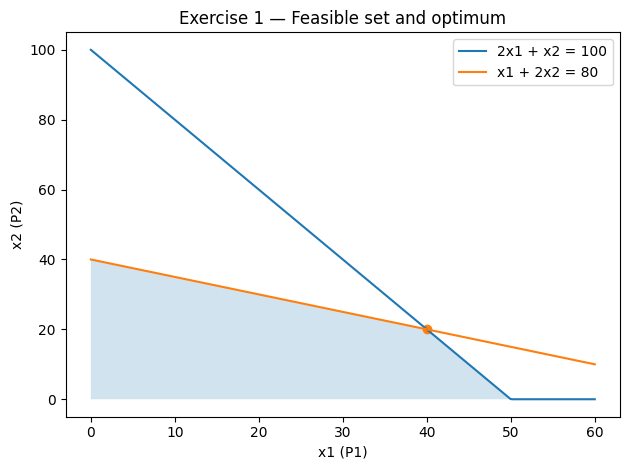

In [8]:
# Feasible region & optimal point (matplotlib)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 60, 300)
r1 = 100 - 2*x      # x2 from 2x1 + x2 <= 100 -> x2 <= 100 - 2x1
r2 = (80 - x)/2.0   # x2 <= (80 - x1)/2

# feasible region boundary (min of the upper bounds, but nonnegative)
x_feas = []
y_feas = []
for xi in x:
    ub = min(100 - 2*xi, (80 - xi)/2.0)
    if ub >= 0 and xi >= 0:
        x_feas.append(xi)
        y_feas.append(ub)

plt.figure()
plt.plot(x, np.maximum(0, r1), label="2x1 + x2 = 100")
plt.plot(x, np.maximum(0, r2), label="x1 + 2x2 = 80")
plt.fill_between(x_feas, 0, y_feas, alpha=0.2)

plt.scatter([opt1["x1"]], [opt1["x2"]], marker="o")
plt.title("Exercise 1 — Feasible set and optimum")
plt.xlabel("x1 (P1)")
plt.ylabel("x2 (P2)")
plt.legend()
plt.tight_layout()
plt.show()

### Solution & Validation

- **Optimal solution**: $x_1 = 40$, $x_2 = 20$.  
- **Objective value**: $Z = 40(40) + 30(20) = 2200$.
- **Binding constraints**: both Resource 1 and Resource 2 (slacks = 0).  
- **Economic intuition**: el óptimo ocurre en la intersección de ambas restricciones activas dado que los beneficios son positivos y las restricciones definen un polígono convexo.

## Exercise 2 — Factory (Products A, B)

### Problem Statement
A factory manufactures products **A** and **B**. Decide the production quantities to **maximize profit**.

**Data**
- Profit per unit:  $50 (A), $60 (B)
- Labor hours:      3 (A), 2 (B);  **availability** = 180
- Materials:        4 (A), 5 (B);  **availability** = 200

### Mathematical Formulation
Variables:
- $x_A$ = unidades de **A**
- $x_B$ = unidades de **B**

Objective:  
$$\max\; Z = 50 x_A + 60 x_B.$$

Constraints:
\[
\begin{aligned}
3x_A + 2x_B &\le 180 &&\text{(Labor)}\\
4x_A + 5x_B &\le 200 &&\text{(Materials)}\\
x_A, x_B &\ge 0.
\end{aligned}
\]

### Implementation

In [9]:
# Implementation with PuLP
import pulp as pl

m2 = pl.LpProblem("Ex2_Factory", pl.LpMaximize)
xA = pl.LpVariable("xA", lowBound=0)
xB = pl.LpVariable("xB", lowBound=0)

m2 += 50*xA + 60*xB
cL = 3*xA + 2*xB <= 180
cM = 4*xA + 5*xB <= 200
m2 += cL
m2 += cM

m2.solve(pl.PULP_CBC_CMD(msg=False))

opt2 = {
    "xA": pl.value(xA),
    "xB": pl.value(xB),
    "Z": pl.value(50*xA + 60*xB),
    "status": pl.LpStatus[m2.status]
}
opt2["slacks"] = {
    "Labor": 180 - (3*opt2["xA"] + 2*opt2["xB"]),
    "Materials": 200 - (4*opt2["xA"] + 5*opt2["xB"]),
}
opt2

{'xA': 50.0,
 'xB': 0.0,
 'Z': 2500.0,
 'status': 'Optimal',
 'slacks': {'Labor': 30.0, 'Materials': 0.0}}

### Visualization

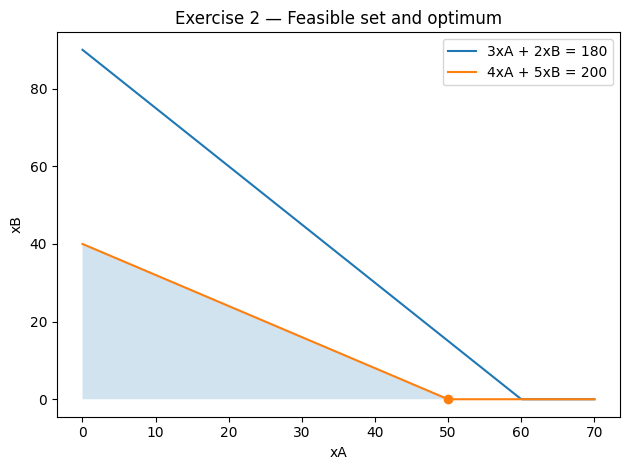

In [10]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 70, 300)
lab = (180 - 3*x)/2.0
mat = (200 - 4*x)/5.0

x_feas, y_feas = [], []
for xi in x:
    ub = min((180 - 3*xi)/2.0, (200 - 4*xi)/5.0)
    if ub >= 0 and xi >= 0:
        x_feas.append(xi); y_feas.append(ub)

plt.figure()
plt.plot(x, np.maximum(0, lab), label="3xA + 2xB = 180")
plt.plot(x, np.maximum(0, mat), label="4xA + 5xB = 200")
plt.fill_between(x_feas, 0, y_feas, alpha=0.2)

plt.scatter([opt2["xA"]], [opt2["xB"]], marker="o")
plt.title("Exercise 2 — Feasible set and optimum")
plt.xlabel("xA")
plt.ylabel("xB")
plt.legend()
plt.tight_layout()
plt.show()

### Solution & Validation

- **Optimal solution**: $x_A = 50$, $x_B = 0$.  
- **Objective value**: $Z = 50(50) + 60(0) = 2500$.  
- **Active constraint**: **Materials** (slack = 0). **Labor** has slack = 30.  
- **Interpretation**: La intersección de las rectas da una $x_B$ negativa (inviable), por lo que el óptimo cae en el vértice factible con $x_B=0$ limitado por materiales.

## Exercise 3 — Crop planning (C1, C2)

### Problem Statement
A farmer has limited **land** and **water**. Decide the planting areas for crops **C1** and **C2** to **maximize profit**.

**Data**
- Profit per unit area:  $70 (C1), $50 (C2)
- Land usage:            1 (C1), 2 (C2); **availability** = 150
- Water usage:           3 (C1), 2 (C2); **availability** = 300

### Mathematical Formulation
Variables (área):
- $x_1$ = área de **C1**
- $x_2$ = área de **C2**

Objective:  
$$\max\; Z = 70 x_1 + 50 x_2.$$

Constraints:
\[
\begin{aligned}
x_1 + 2x_2 &\le 150 &&\text{(Land)}\\
3x_1 + 2x_2 &\le 300 &&\text{(Water)}\\
x_1, x_2 &\ge 0.
\end{aligned}
\]

### Implementation

In [11]:
# Implementation with PuLP
import pulp as pl

m3 = pl.LpProblem("Ex3_Crops", pl.LpMaximize)
x1 = pl.LpVariable("x1_C1", lowBound=0)
x2 = pl.LpVariable("x2_C2", lowBound=0)

m3 += 70*x1 + 50*x2
cL = x1 + 2*x2 <= 150
cW = 3*x1 + 2*x2 <= 300
m3 += cL
m3 += cW

m3.solve(pl.PULP_CBC_CMD(msg=False))

opt3 = {
    "x1": pl.value(x1),
    "x2": pl.value(x2),
    "Z": pl.value(70*x1 + 50*x2),
    "status": pl.LpStatus[m3.status]
}
opt3["slacks"] = {
    "Land": 150 - (opt3["x1"] + 2*opt3["x2"]),
    "Water": 300 - (3*opt3["x1"] + 2*opt3["x2"]),
}
opt3

{'x1': 75.0,
 'x2': 37.5,
 'Z': 7125.0,
 'status': 'Optimal',
 'slacks': {'Land': 0.0, 'Water': 0.0}}

### Visualization

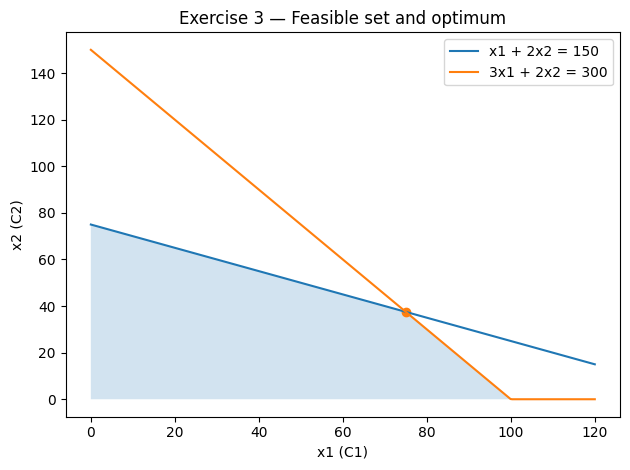

In [12]:
# Visualization
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 120, 300)
land = 150 - x        # x2 <= (150 - x1)/2 -> careful: constraint is x1 + 2x2 <= 150 -> x2 <= (150 - x1)/2
land_line = (150 - x)/2.0
water_line = (300 - 3*x)/2.0

x_feas, y_feas = [], []
for xi in x:
    ub = min((150 - xi)/2.0, (300 - 3*xi)/2.0)
    if ub >= 0 and xi >= 0:
        x_feas.append(xi); y_feas.append(ub)

plt.figure()
plt.plot(x, np.maximum(0, land_line), label="x1 + 2x2 = 150")
plt.plot(x, np.maximum(0, water_line), label="3x1 + 2x2 = 300")
plt.fill_between(x_feas, 0, y_feas, alpha=0.2)

plt.scatter([opt3["x1"]], [opt3["x2"]], marker="o")
plt.title("Exercise 3 — Feasible set and optimum")
plt.xlabel("x1 (C1)")
plt.ylabel("x2 (C2)")
plt.legend()
plt.tight_layout()
plt.show()

### Solution & Validation

- **Optimal solution**: $x_1 = 75$, $x_2 = 37.5$.  
- **Objective value**: $Z = 70(75) + 50(37.5) = 7125$.  
- **Binding constraints**: **Land** y **Water** (ambas con slack = 0).  
- **Comentario**: el óptimo está en la intersección de ambas restricciones. La asignación desplaza parcialmente el área hacia **C1** por su mayor beneficio marginal.

## Conclusion

Se resolvieron los **tres modelos** por PL de forma consistente con *Assignment 1.2*: se formuló cada problema, se resolvió con PuLP (CBC), se validaron los resultados (estatus óptimo, valores, holguras) y se incluyeron visualizaciones de la región factible y del punto óptimo.